<a href="https://colab.research.google.com/github/comparativechrono/Phase-oscillator-modelling-of-circadian-entrainment-in-transplanted-human-hearts/blob/main/Hearn_(2025)_Figure_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

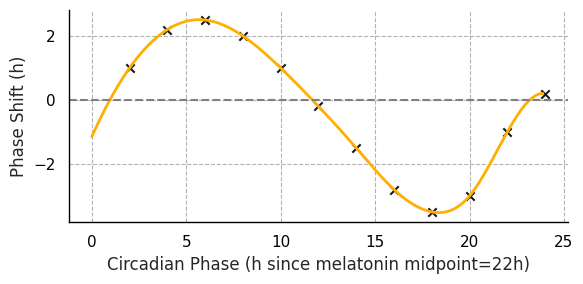

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns

# Shared setup
omega_H = 2 * np.pi / 24.0
phase_hours = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
shift_hours = np.array([1.0,2.2,2.5,2.0,1.0,-0.2,-1.5,-2.8,-3.5,-3.0,-1.0,0.2])
phase_rad = phase_hours / 24 * 2 * np.pi
shift_rad = shift_hours / 24 * 2 * np.pi
interp_func = interp1d(phase_rad, shift_rad, kind='cubic', fill_value='extrapolate')

def Z(phi):
    return interp_func(phi % (2*np.pi))

#Interpolated PRC
sns.set_theme(style="whitegrid", rc={
        "grid.linestyle": "--",
        "grid.linewidth": 0.8,
        "grid.color": "gray",
        "grid.alpha": 0.6,
        "axes.edgecolor": "black",
        "axes.linewidth": 1.0,
        "xtick.color": "black",
        "ytick.color": "black",
    })
plt.figure(figsize=(6,3))
phi_fine = np.linspace(0, 2*np.pi, 200, endpoint=False)  # 0 ≤ φ < 2π
shift_fine = Z(phi_fine)/(2*np.pi)*24
plt.plot(phi_fine/(2*np.pi)*24, shift_fine, lw=2, color='#FFAF00')
plt.scatter(phase_hours, shift_hours, color='k', marker = "x")
plt.axhline(0, color='gray', ls='--')
plt.xlabel('Circadian Phase (h since melatonin midpoint=22h)')
plt.ylabel('Phase Shift (h)')
sns.despine()
plt.tight_layout()
plt.savefig('Figure_1.png', dpi=300, bbox_inches='tight')
plt.show()
